<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_Projet_pr%C3%A9diction_immo_casablanca_ml2_et_ml3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Données simplifées


In [ ]:
import pandas as pd

data=pd.read_csv("https://dataks.bitbucket.io/ml/casa_racine_light.csv")

Données complètes

In [ ]:

data=pd.read_csv("https://dataks.bitbucket.io/ml/casa_racine_full.csv")

Pour chaque phase de l'apprentisssage, mettre en oeuvre ce que vous avez appris pour créer un modèle à partir des données (simplifiées ou complètes), pour prédire le prix immobilier.



In [21]:
#Import des données et nettoyage
import pandas as pd
import numpy as np

inc=pd.read_csv("https://dataks.bitbucket.io/ml/casa_racine_full.csv",na_values=np.NaN)
inc = inc.replace(to_replace='Meublé', value=1, regex=True)
inc = inc.replace(to_replace='Non-meublé', value=0, regex=True)
inc = inc.replace(to_replace='Appartement', value=0, regex=True)
inc = inc.replace(to_replace='Duplex', value=1, regex=True)
inc = inc.replace(to_replace='3 + Chambre de service', value=6)
inc = inc.replace(to_replace='4 + Chambre de service', value=7)
inc = inc.replace(to_replace='5 + Chambre de service', value=8)
inc = inc.replace('?',np.NaN)
inc = inc.dropna(axis=0, how='any')
len(inc) - inc.count()
inc.head(15)

,Prix,Type,Référence,Pièces,Salles de bains,Mobiliers,Surface,Installation,Agent,Societe,Description,Publication,lien
0,4700000,0,Hana,6,3.0,0.0,240,"Agent de sécurité,Animaux autorisés,Balcon,Bua...",Dana Crainic,Dana Immobilier + Partners,Belle appartement a vendre sur RACINE la rue A...,Publié: more than 6 months ago,https://www.sarouty.ma/acheter/appartement-a-v...
1,5700000,1,Associ,7,4.0,1.0,313,"Agent de sécurité,Animaux autorisés,Balcon,Bua...",Dana Crainic,Dana Immobilier + Partners,Ne laissez pas passer cet appartement en duple...,Publié: more than 6 months ago,https://www.sarouty.ma/acheter/duplex-a-vendre...
2,3600000,0,casaimmo-2065691,3,3.0,0.0,173,"Animaux autorisés,Climatisation centrale,Conci...",CASA IMMO STORE,Casa Immo Store,Casa Immo vous propose un appartement de très ...,Publié: il y a 24 jours,https://www.sarouty.ma/acheter/appartement-a-v...
3,2200000,0,VAQR111200,3,2.0,0.0,111,"Balcon,Concierge,Parking couvert,Salle de spor...",Said Nouqrat,Trust Immo,0,Publié: il y a 2 mois,https://www.sarouty.ma/acheter/appartement-a-v...
5,5500000,0,clvaparr-03,6,4.0,0.0,269,"Chambre de personnel de maison,Concierge,Dress...",Clavis conseil immo Nabila Alami,Clavis,A vendre tres bel appartement haut standing de...,Publié: il y a 5 mois,https://www.sarouty.ma/acheter/appartement-a-v...
6,3400000,0,Skalli,6,3.0,0.0,226,"Agent de sécurité,Animaux autorisés,Balcon,Cha...",Dana Crainic,Dana Immobilier + Partners,L'agence Dana_immobilier vous proposer un be...,Publié: more than 6 months ago,https://www.sarouty.ma/acheter/appartement-a-v...
8,4650000,0,casaimmo-1737522,3,3.0,0.0,230,"Agent de sécurité,Animaux autorisés,Balcon,Bua...",CASA IMMO STORE,Casa Immo Store,0,Publié: il y a 5 mois,https://www.sarouty.ma/acheter/appartement-a-v...
9,3800000,0,remaxexclusive-2053335,7,3.0,0.0,228,Chambre de personnel de maison,Hicham Boussatta,Remax Exclusive,Racine Vente duplex terrasse \nRemax Exclusive...,Publié: il y a un mois,https://www.sarouty.ma/acheter/appartement-a-v...
10,4770000,0,linkedimmo-1544664,7,4.0,0.0,300,"Agent de sécurité,Animaux autorisés,Balcon,Cha...",Mohamed Benjelloun,Linked Immo,Linked Immo vous propose à la vente ce grand a...,Publié: more than 6 months ago,https://www.sarouty.ma/acheter/appartement-a-v...
11,3400000,0,sury-2002598,3,2.0,1.0,143,"Agent de sécurité,Animaux autorisés,Balcon,Cli...",Edouard SURY,SURY Immobilier,0,Publié: il y a 2 mois,https://www.sarouty.ma/acheter/appartement-a-v...


In [28]:
print(inc.info())
print("Description DF :\n",inc.describe())
inc.Pièces = pd.to_numeric(inc.Pièces)
inc.Type = pd.to_numeric(inc.Type)
inc.Mobiliers = pd.to_numeric(inc.Mobiliers)
print ("type:\n",inc.Pièces.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 295
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Prix             90 non-null     int64  
 1   Type             90 non-null     int64  
 2   Référence        90 non-null     object 
 3   Pièces           90 non-null     int64  
 4   Salles de bains  90 non-null     float64
 5   Mobiliers        90 non-null     float64
 6   Surface          90 non-null     int64  
 7   Installation     90 non-null     object 
 8   Agent            90 non-null     object 
 9   Societe          90 non-null     object 
 10  Description      90 non-null     object 
 11  Publication      90 non-null     object 
 12  lien             90 non-null     object 
dtypes: float64(2), int64(4), object(7)
memory usage: 9.8+ KB
None
Description DF :
                Prix       Type  ...  Mobiliers     Surface
count  9.000000e+01  90.000000  ...  90.000000   90.000000
mea

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 295
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Prix             90 non-null     int64  
 1   Type             90 non-null     int64  
 2   Référence        90 non-null     object 
 3   Pièces           90 non-null     int64  
 4   Salles de bains  90 non-null     float64
 5   Mobiliers        90 non-null     float64
 6   Surface          90 non-null     int64  
 7   Installation     90 non-null     object 
 8   Agent            90 non-null     object 
 9   Societe          90 non-null     object 
 10  Description      90 non-null     object 
 11  Publication      90 non-null     object 
 12  lien             90 non-null     object 
dtypes: float64(2), int64(4), object(7)
memory usage: 9.8+ KB
None
Description DF :
                Prix       Type  ...  Mobiliers     Surface
count  9.000000e+01  90.000000  ...  90.000000   90.000000
mea

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f503bcf92e8>,
      dtype=object)

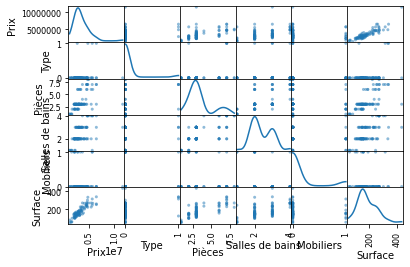

In [29]:
#Analyse descriptive

import matplotlib.pyplot as plt

print(inc.info())
print("Description DF :\n",inc.describe())

pd.plotting.scatter_matrix(inc, diagonal='kde')

In [30]:
from sklearn.model_selection import train_test_split

X = inc[['Type','Pièces',
        'Salles de bains','Mobiliers','Surface']]

y = inc['Prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


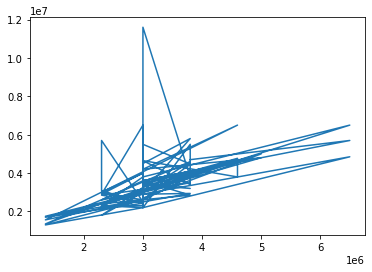

In [32]:
#Modélisation
#On va utiliser la régression logistique
import numpy as np
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(max_iter=1200,penalty='none')
clf.fit(X.iloc[:, :2],y)
clf.score(X.iloc[:, :2],y)
pred = clf.predict(X.iloc[:, :2])

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


plt.plot(pred,y)
plt.show()

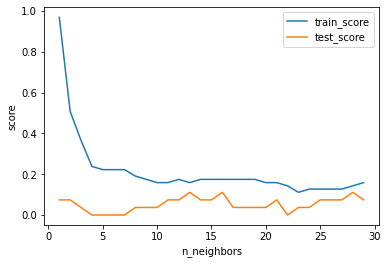

In [40]:
#Modélisation
#On va utiliser la KNN car les variables explicatives sont catégoriques et donc on peut détecter un pattern en utilisant KNN


from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.3, random_state=0)

clf = KNeighborsClassifier(n_neighbors = 5)
clf = clf.fit(X_train, y_train)

rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])
res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])

res_scores.plot(kind="line",x="n_neighbors",y="train_score")
plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

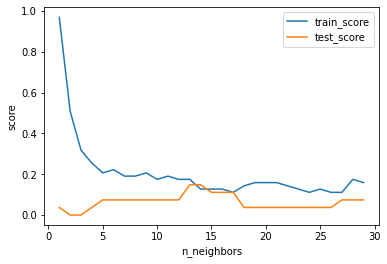

In [41]:
# On va faire la normalisation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.3, random_state=0)

scaler = MinMaxScaler()
#scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])


res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])

res_scores.plot(kind="line",x="n_neighbors",y="train_score")

plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

In [42]:
clf.score(X_train, y_train)

0.15873015873015872

In [44]:
clf.score(X_test, y_test)

0.07407407407407407

    n_neighbors  train_score  test_score
0             1     0.968254    0.074074
1             2     0.507937    0.000000
2             3     0.333333    0.000000
3             4     0.253968    0.037037
4             5     0.206349    0.074074
5             6     0.206349    0.074074
6             7     0.190476    0.074074
7             8     0.190476    0.074074
8             9     0.206349    0.074074
9            10     0.174603    0.074074
10           11     0.190476    0.074074
11           12     0.190476    0.074074
12           13     0.174603    0.148148
13           14     0.126984    0.148148
14           15     0.126984    0.111111
15           16     0.126984    0.111111
16           17     0.111111    0.111111
17           18     0.142857    0.037037
18           19     0.158730    0.037037
19           20     0.174603    0.037037
20           21     0.142857    0.037037
21           22     0.142857    0.037037
22           23     0.142857    0.037037
23           24 

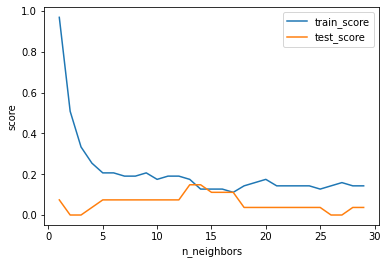

In [45]:
rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei,p=nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])


res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])
print(res_scores)

res_scores.plot(kind="line",x="n_neighbors",y="train_score")

plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()